
# Task 1: Experimental study of the time complexity of different algorithms

## 1.1 Calculation of the time complexity for the algorithms below for n-dimensional random vector (n from 0 to 2000). The running time is calculated as the average time of five runs

In [37]:
import random
import numpy as np
from time import perf_counter as time
import matplotlib.pyplot as plt


# Const function
def const(vect):
    
    return 0


# The summation of vector's elements    
def el_sum(vect):
    
    ans = 0
    for i in range(len(vect)):
        ans += vect[i]
        
    return ans


# The product of vector's elements    
def el_prod(vect):
    
    ans = 1
    for i in range(len(vect)):
        ans *= vect[i]
        
    return ans


# Direct calculation of a polynomial with elements of vector as coefficients
# Default argument = 1.5
def el_poly_dir(vect, arg = 1.5):
    
    ans = 0
    for i in range(len(vect)):
        ans += vect[i] * arg ** (i)
        
    return ans


# Horner's method of Calculation of the polynomial with elements of vector as coefficients 
# Default argument = 1.5
def el_poly_horner(vect, arg = 1.5):
    
    ans = 0
    for i in range(len(vect), 0, -1):
        ans = vect[i - 1] + arg * ans
        
    return ans


# Bubble sort - simple sorting algorithm
def bubble_sort(vect):
    
    n = len(vect)
    for i in range(n):
        for j in range(n - 1):
            if vect[j] > vect[j + 1]:
                vect[j], vect[j + 1] = vect[j + 1], vect[j]
    
    return vect


# Quick sort - we use sorting from the numpy module
def quick_sort(vect):
    
    return np.sort(vect, kind = 'quicksort')


# Timsort - also use sorting from the numpy module
def timsort(vect):
    
    return np.sort(vect, kind = 'stable')


# Dictionary of functions to comfort use
func_dict = {'alg_1': const, 'alg_2': np.sum, 'alg_3': np.prod, 'alg_4': el_poly_dir, 'alg_5': el_poly_horner,\
             'alg_6': bubble_sort, 'alg_7': quick_sort, 'alg_8': timsort}

# Testing - need to use tuples in order not to change the vector in the sorting process
vect = (1, 2, 3, 0)
description_arr = ['const(vect)', 'el_sum(vect)', 'el_prod(vect)', 'el_poly_dir(vect, 1.5)', 'el_poly_horner(vect, 1.5)',\
                  'bubble_sort(vect)', 'quick_sort(vect)', 'timsort(vect)']

for i in range(1, 9):
    print(description_arr[i - 1] + ' = ', func_dict['alg_' + str(i)](list(vect)))
    #print(vect)

const(vect) =  0
el_sum(vect) =  6
el_prod(vect) =  0
el_poly_dir(vect, 1.5) =  10.75
el_poly_horner(vect, 1.5) =  10.75
bubble_sort(vect) =  [0, 1, 2, 3]
quick_sort(vect) =  [0 1 2 3]
timsort(vect) =  [0 1 2 3]


In [38]:

# Variables for vector generation: a - left border, b - right border of generation
a = 0
b = 1e3
random.seed(7)

# Time complexity searching for each n and each algorithm

time_compl_arr = {'alg_1': [], 'alg_2': [], 'alg_3': [], 'alg_4': [], 'alg_5': [], 'alg_6': [],\
                  'alg_7': [], 'alg_8': []}

# Time complexity searching part for each vector size
for n in range(1, 2000):
    
    # Random vector generation - need to use tuple in order not to change the vector in the sorting process
    vect = tuple(random.randint(a, b) for i in range(n))
    
    # Time complexity searching part for each algorithm with fixed vector size
    for alg_num in range(1, 9): 
        
        curr_time_arr = []
        
        for i in range(5):
            
            list_vect = list(vect)
            curr_key = 'alg_' + str(alg_num)
            
            # THE MAIN PART - time searching
            start_time = time() 
            func_dict[curr_key](list_vect)
            end_time = time()
            
            curr_time_arr.append(end_time - start_time)
        
        time_compl_arr['alg_' + str(alg_num)].append(np.mean(curr_time_arr))

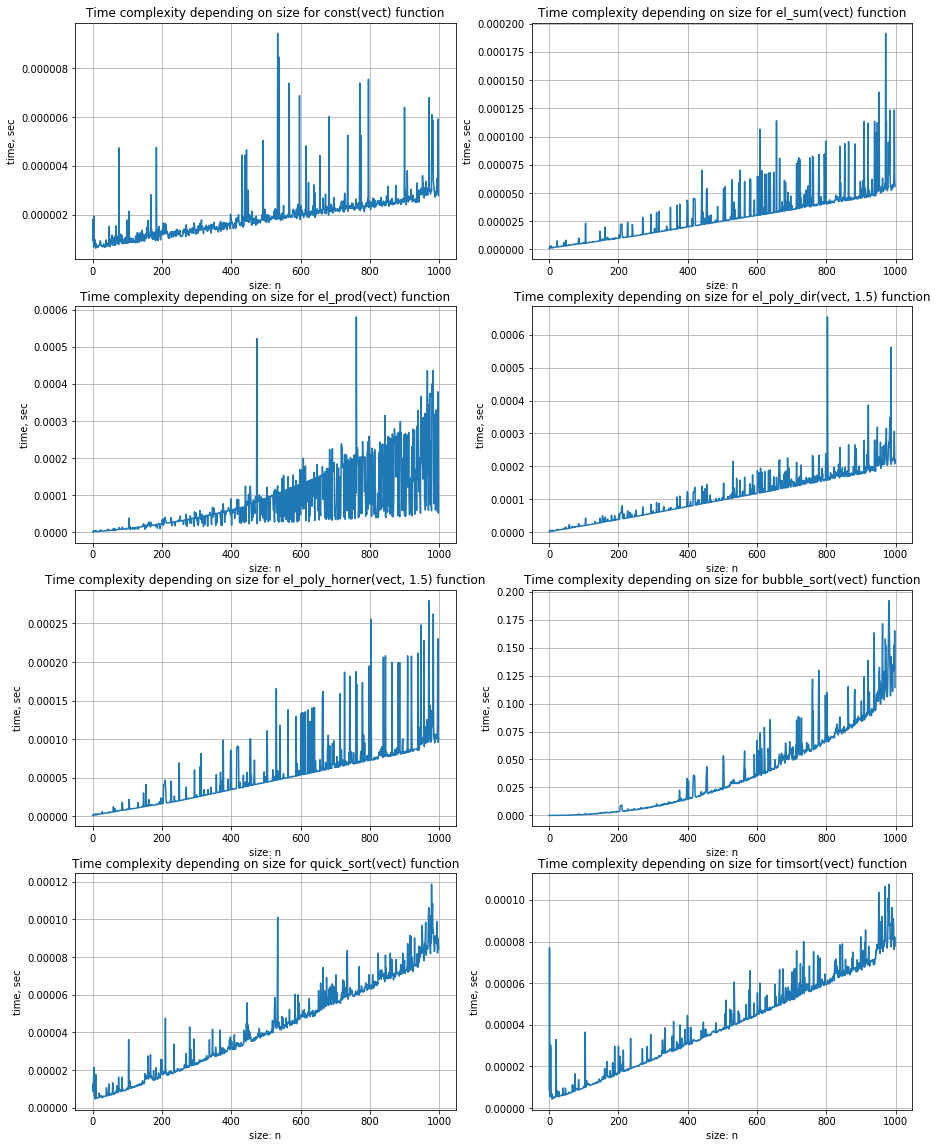

In [39]:

# Visualization
fig = plt.figure(figsize = (15, 20))

for alg_num in range(1, 9):

    plt.subplot(4, 2, alg_num)
    plt.plot([i for i in range(len(time_compl_arr['alg_' + str(alg_num)]))], time_compl_arr['alg_' + str(alg_num)])
    plt.title('Time complexity depending on size for {:} function'.format(description_arr[alg_num - 1]))
    
    plt.xlabel('size: n')
    plt.ylabel('time, sec')
    plt.grid()
    
plt.show()

## 1.2 Generate random matrices A and B of size n × n with non-negative elements. Calculate the  time complexity for usual matrix product for A and B:

In [ ]:
import numpy as np
from time import perf_counter as time
import matplotlib.pyplot as plt


# Algorithm of matrix production
def matrix_prod(A, B):
    
    n = len(A)
    ans = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                ans[i, j] += A[i][k] * B[k][j]
                
    return ans


# Working part
np.random.seed(7)
max_n = 500
time_res_arr = []

for n in range(1, max_n):
    
    A = np.random.random((n, n))
    B = np.random.random((n, n))
    
    curr_time_arr = []
    for i in range(5):
        start_time = time()
        matrix_prod(A, B)
        end_time = time()
        curr_time_arr.append(end_time - start_time)
    
    time_res_arr.append(np.mean(curr_time_arr))


In [ ]:
fig = plt.figure(figsize = (12, 10))
plt.plot([i for i in range(len(time_res_arr))], time_res_arr, linewidth=2.0)

plt.title('time of n x n matrix multiplying depending on size')
plt.xlabel('size: n')
plt.ylabel('time, sec')

plt.grid()
plt.show()